# Additions from Serina

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mode, linregress
import numpy as np
import seaborn as sns

In [2]:
df_tone = pd.read_csv('speeches_with_tone_and_nominate.tsv', delimiter='\t', dtype={'speech_id': str})
df_tone.head()

,Unnamed: 0,Unnamed: 0.1,speech_id,congress,date,imm_prob,keyword,chamber,party,state,speaker,speaker_id,pro_prob_sum,neutral_prob_sum,anti_prob_sum,tone_label,tone_label_int,nominate_dim1,era,nominate_dim2
0,0,0,430000211,43,18730306,0.995032,1,S,R,NV,Air. STEWART,43062621,0.000135,0.999743,0.000122,neutral,1,0.252,Pre-1924,0.215
1,1,1,430000464,43,18730311,0.999902,1,S,R,MI,Mr. CHANDLER,43047031,0.000167,0.000286,0.999547,anti,0,0.601,Pre-1924,0.059
2,2,2,430000796,43,18730314,0.998244,1,S,L,MO,Mr. SCLURZ,43040261,0.000154,0.999623,0.000223,neutral,1,0.022,Pre-1924,-0.343
3,3,3,430000904,43,18730318,0.999881,1,S,D,GA,Mr. NORWOOD,43053171,0.000149,0.999755,0.000096,neutral,1,-0.491,Pre-1924,0.054
4,4,4,430001178,43,18730320,0.990667,1,S,R,KS,Mr. CAcDWELL,43040911,0.000298,0.000144,0.999558,anti,0,0.312,Pre-1924,0.152


In [18]:
# sometimes nominate score isn't consistent across speaker_id
df_tone[df_tone.speaker_id == '100108471']

,Unnamed: 0,Unnamed: 0.1,speech_id,congress,date,imm_prob,keyword,chamber,party,state,speaker,speaker_id,pro_prob_sum,neutral_prob_sum,anti_prob_sum,tone_label,tone_label_int,nominate_dim1,era,nominate_dim2
111727,111727,111727,1000000923,100,19870106,0.999783,1,S,D,MI,Mr. RIEGLE,100108471,0.000123,0.000158,0.999719,anti,0,-0.426,Post-1965,-0.121
111804,111804,111804,1000006485,100,19870203,0.997672,1,S,D,MI,Mr. RIEGLE,100108471,0.999757,0.000156,0.000088,pro,2,-0.426,Post-1965,-0.121
111952,111952,111952,1000012854,100,19870311,0.988665,1,S,D,MI,Mr. RIEGLE,100108471,1.997873,0.001629,0.000498,pro,2,-0.426,Post-1965,-0.121
112053,112053,112053,1000019046,100,19870330,0.999439,1,S,D,MI,Mr. RIEGLE,100108471,0.000092,0.999799,0.000109,neutral,1,-0.426,Post-1965,-0.121
112133,112133,112133,1000024315,100,19870408,0.999771,1,S,D,MI,Mr. RIEGLE,100108471,0.999708,0.000211,0.000081,pro,2,-0.426,Post-1965,-0.121
112137,112137,112137,1000025572,100,19870409,0.997449,0,S,D,MI,Mr. RIEGLE,100108471,0.999652,0.000236,0.000112,pro,2,-0.426,Post-1965,-0.121
112893,112893,112893,1000088079,100,19870820,0.997188,1,S,D,MI,Mr. DONALD R. ARBUCKLE,100108471,0.000171,0.999623,0.000206,neutral,1,-0.395,Post-1965,-0.116
112923,112923,112923,1000090531,100,19870915,0.999760,1,S,D,MI,Mr. RIEGLE,100108471,1.003371,0.993924,0.002705,pro,2,-0.426,Post-1965,-0.121
113059,113059,113059,1000105476,100,19871006,0.999760,1,S,D,MI,Mr. RIEGLE,100108471,0.999713,0.000209,0.000078,pro,2,-0.426,Post-1965,-0.121
113218,113218,113218,1000119775,100,19871028,0.998887,0,S,D,MI,Mr. RIEGLE,100108471,0.999741,0.000181,0.000078,pro,2,-0.426,Post-1965,-0.121


In [3]:
df_tone.speaker_id.value_counts()

Unknown      25695
J000032        525
D000563        444
L000174        292
68080231       287
             ...  
93113020         1
64071750         1
89100750         1
61083590         1
100111440        1
Name: speaker_id, Length: 20689, dtype: int64

In [4]:
speaker_df = []
for sid, subdf in df_tone.groupby('speaker_id'):
    if len(subdf) >= 10:
        speaker_dict = {'speaker_id': sid, 
                        'num_speeches': len(subdf)}
        for attr in ['chamber', 'party', 'state', 'speaker', 'nominate_dim1', 'nominate_dim2', 'era']:
            attr_mode, mode_count = mode(subdf[attr].values)
            speaker_dict[attr] = attr_mode[0]
            speaker_dict['%s_num_matched' % attr] = mode_count[0]
        counts = subdf.tone_label.value_counts()
        for lbl in ['pro', 'neutral', 'anti']:
            speaker_dict['num_%s' % lbl] = counts[lbl] if lbl in counts else 0
        speaker_dict['tone'] = 100. * (speaker_dict['num_pro'] - speaker_dict['num_anti']) / len(subdf)
        speaker_df.append(speaker_dict)
columns = list(speaker_df[-1].keys())
speaker_df = pd.DataFrame(speaker_df, columns=columns)

In [6]:
print(len(speaker_df))
speaker_df.head()

3735


,speaker_id,num_speeches,chamber,chamber_num_matched,party,party_num_matched,state,state_num_matched,speaker,speaker_num_matched,nominate_dim1,nominate_dim1_num_matched,nominate_dim2,nominate_dim2_num_matched,era,era_num_matched,num_pro,num_neutral,num_anti,tone
0,100106591,32,S,32,D,32,FL,32,Mr. CHILES,31,-0.224,32,0.555,32,Post-1965,32,8,15,9,-3.125000
1,100107031,10,S,10,R,10,CT,10,Mr. WEICKER,10,0.072,10,-0.995,10,Post-1965,10,3,6,1,20.000000
2,100107101,13,S,13,R,13,CO,13,Mr. ARMSTRONG,13,0.508,13,-0.140,13,Post-1965,13,7,5,1,46.153846
3,100107131,11,S,11,R,11,MN,11,Mr. BOSCHWITZ,11,0.275,11,-0.734,11,Post-1965,11,6,4,1,45.454545
4,100107391,15,S,15,R,15,ID,15,Mr. McCLURE,14,0.492,15,0.043,15,Post-1965,15,6,9,0,40.000000


In [60]:
speaker_df.era.value_counts()

Post-1965    2070
1924-1965     865
Pre-1924      800
Name: era, dtype: int64

3710
D Pre-1924 0.25966212988973 0.08991148692336534
D 1924-1965 -0.30169921584328274 0.06313319665760629
D Post-1965 -0.6804022335188898 0.08027012975005446
R Pre-1924 0.11521267613711145 0.07631074108041784
R 1924-1965 -0.43487229126949606 0.06148806360560402
R Post-1965 -0.9035833300622391 0.062272506269809486


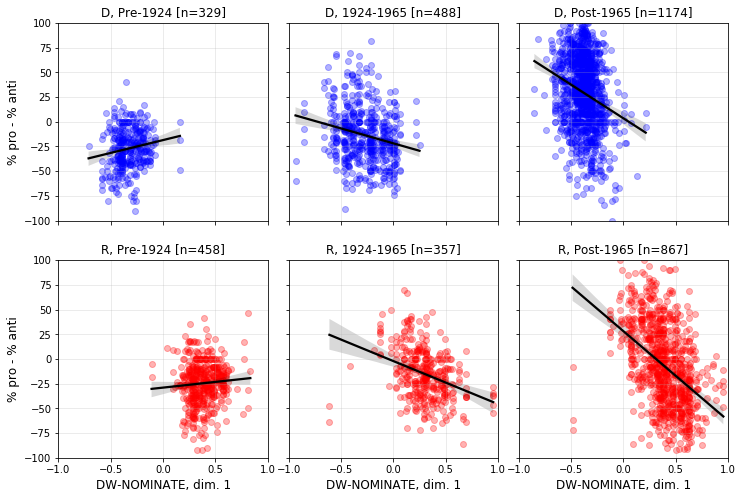

In [5]:
nominate_match_rate = (speaker_df.nominate_dim1_num_matched / speaker_df.num_speeches).values
party_match_rate = (speaker_df.party_num_matched / speaker_df.num_speeches).values
era_match_rate = (speaker_df.era_num_matched / speaker_df.num_speeches).values
to_keep = ((nominate_match_rate >= 0.9) & (party_match_rate >= 0.9) & (era_match_rate >= 0.9))
kept_speaker_df = speaker_df.iloc[to_keep]
print(len(kept_speaker_df))

fig, axes = plt.subplots(2, 3, figsize=(12, 8), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.1)
for i, p in enumerate(['D', 'R']):
    color = 'blue' if p == 'D' else 'red'
    for j, e in enumerate(['Pre-1924', '1924-1965', 'Post-1965']):
        subdf = kept_speaker_df[(kept_speaker_df.party == p) & (kept_speaker_df.era == e)]
        ax = axes[i, j]
        ax.set_title('%s, %s [n=%d]' % (p, e, len(subdf)), fontsize=12)
        y = subdf.tone.values
        x = subdf.nominate_dim1.values
        slope, intercept, rval, pval, se = linregress(x, y / 100)
        print(p, e, slope, se)
        sns.regplot(y=y, x=x, scatter=True, ax=ax, 
                    scatter_kws={'alpha':0.3, 'color':color}, line_kws={'color':'black'})
        ax.set_xlim(-1, 1)
        ax.set_ylim(-100, 100)
        ax.grid(alpha=0.3)
        if j == 0:
            ax.set_ylabel('% pro - % anti', fontsize=12)
        else:
            ax.set_ylabel('')
        if i == 1:
            ax.set_xlabel('DW-NOMINATE, dim. 1', fontsize=12)
        else:
            ax.set_xlabel('')
plt.savefig('dw1_v_tone.pdf', bbox_inches='tight')
plt.show()

3710
D Pre-1924 -0.031174242960471377 0.02665618435565048
D 1924-1965 -0.12120044463904817 0.023180353871275018
D Post-1965 -0.245987254764164 0.025685894632026963
R Pre-1924 -0.00778237926091018 0.021994427950058043
R 1924-1965 -0.18524790165871982 0.0265133543323154
R Post-1965 -0.38627889241865615 0.03791689535644499


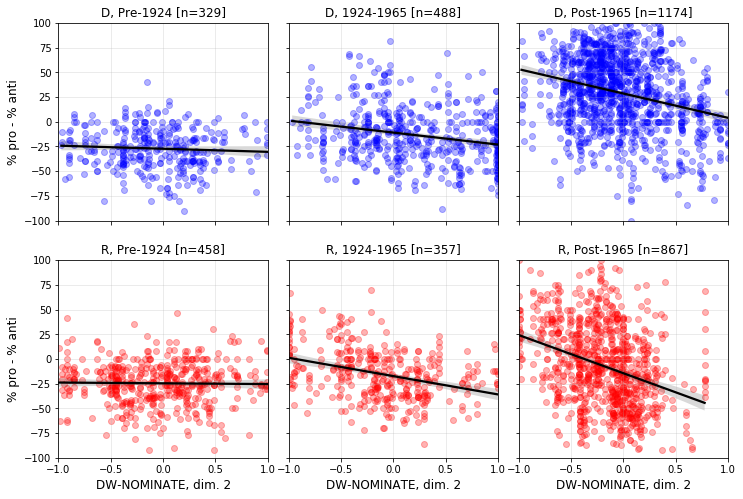

In [6]:
nominate_match_rate = (speaker_df.nominate_dim2_num_matched / speaker_df.num_speeches).values
party_match_rate = (speaker_df.party_num_matched / speaker_df.num_speeches).values
era_match_rate = (speaker_df.era_num_matched / speaker_df.num_speeches).values
to_keep = ((nominate_match_rate >= 0.9) & (party_match_rate >= 0.9) & (era_match_rate >= 0.9))
kept_speaker_df = speaker_df.iloc[to_keep]
print(len(kept_speaker_df))

fig, axes = plt.subplots(2, 3, figsize=(12, 8), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.1)
for i, p in enumerate(['D', 'R']):
    color = 'blue' if p == 'D' else 'red'
    for j, e in enumerate(['Pre-1924', '1924-1965', 'Post-1965']):
        subdf = kept_speaker_df[(kept_speaker_df.party == p) & (kept_speaker_df.era == e)]
        ax = axes[i, j]
        ax.set_title('%s, %s [n=%d]' % (p, e, len(subdf)), fontsize=12)
        y = subdf.tone.values
        x = subdf.nominate_dim2.values
        slope, intercept, rval, pval, se = linregress(x, y / 100)
        print(p, e, slope, se)
        sns.regplot(y=y, x=x, scatter=True, ax=ax, 
                    scatter_kws={'alpha':0.3, 'color':color}, line_kws={'color':'black'})
        ax.set_xlim(-1, 1)
        ax.set_ylim(-100, 100)
        ax.grid(alpha=0.3)
        if j == 0:
            ax.set_ylabel('% pro - % anti', fontsize=12)
        else:
            ax.set_ylabel('')
        if i == 1:
            ax.set_xlabel('DW-NOMINATE, dim. 2', fontsize=12)
        else:
            ax.set_xlabel('')
plt.savefig('dw2_v_tone.pdf', bbox_inches='tight')
plt.show()

# Original code from Julia 

In [ ]:
import pandas as pd
import unidecode
import string
from collections import defaultdict
import seaborn as sns
import json
from fuzzywuzzy import process
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
pd.options.mode.chained_assignment = None  # default='warn'

In [ ]:
#Match names for a given congress (and/or state)
#Easiest will be to measure the all caps
#What elements of the nom and tone set have overlapping characters 
#Goal to map TONE names to NOMINATE names 
#nominate_dim1

In [20]:
df_nom = pd.read_csv('HSall_members.csv')
df_tone = pd.read_csv('imm_speech_ids_with_tone_simple.tsv',dtype={'speech_id': str})

In [77]:
def remove_honorific(name):
    no_honorific_list = name.split()[1:]
    if 'of' in no_honorific_list:
        ix = no_honorific_list.index('of')
        no_honorific_list = no_honorific_list[:ix]
    if len(no_honorific_list) >= 1:
        surname = no_honorific_list[-1].strip(string.punctuation)
    else:
        surname = name
    if '.' in surname:
        surname = surname.split('.')[1]
    return surname.upper()

In [78]:
def normalize_diacritics(name):
    surname = name.split(',')[0].upper()
    surname = surname.split()[-1]
    return unidecode.unidecode(surname)

In [79]:
def map_names_tone_to_nom(tone_list,nom_list):
    name_map = {}
    nom_names = [normalize_diacritics(x) for x in nom_list]
    if len(nom_names) > 0:
        for name in tone_list:
            try:
                surname = remove_honorific(name)
                surname = normalize_diacritics(surname)
                name_map[name] = process.extractOne(surname, nom_names)
            except:
                continue
    return name_map

In [80]:
def map_nom_names_to_ideology(df_nom_sub):
    df_temp = df_nom_sub[['bioname','nominate_dim1']]
    df_temp['name'] = [normalize_diacritics(x) for x in df_temp['bioname']]
    return df_temp[['name','nominate_dim1']].set_index('name').to_dict()['nominate_dim1']

In [286]:
def map_nom_names_to_dim2(df_nom_sub):
    df_temp = df_nom_sub[['bioname','nominate_dim2']]
    df_temp['name'] = [normalize_diacritics(x) for x in df_temp['bioname']]
    return df_temp[['name','nominate_dim2']].set_index('name').to_dict()['nominate_dim2']

In [287]:
name_map = defaultdict(lambda: defaultdict(lambda: defaultdict()))
ideology_map = defaultdict(lambda: defaultdict(lambda: defaultdict()))
dim2_map = defaultdict(lambda: defaultdict(lambda: defaultdict()))
for congress in congress_sessions:
    for state in state_list:
        df_nom_sub = df_nom[(df_nom['congress'] == congress)&(df_nom['state_abbrev']==state)]
        df_tone_sub = df_tone[(df_tone['congress']==congress) & (df_tone['state']==state)]
        nom_names = list(set(df_nom_sub['bioname']))
        tone_names = list(set(df_tone_sub['speaker']))
        name_map[congress][state] = map_names_tone_to_nom(tone_names,nom_names)
        ideology_map[congress][state] = map_nom_names_to_ideology(df_nom_sub)
        dim2_map[congress][state] = map_nom_names_to_dim2(df_nom_sub)


In [102]:
with open('tone_to_nom_names.json','w') as f:
    json.dump(name_map,f)

In [103]:
with open('nom_name_to_ideology.json','w') as f2:
    json.dump(ideology_map,f2)

In [288]:
with open('nom_name_to_dim2.json','w') as f3:
    json.dump(dim2_map,f3)

In [123]:
count_perfect = 0
count_misspell = 0
count_not_found = 0

people = df_tone['speaker']
states = df_tone['state']
congresses = df_tone['congress']
for i in range(len(people)):
    p = people[i]
    s = states[i]
    c = congresses[i]
    if p in name_map[c][s] and name_map[c][s][p][1] == 100:
        count_perfect += 1
    elif p in name_map[c][s] and name_map[c][s][p][1] < 100:
        count_misspell += 1
    elif p not in name_map[c][s]:
        count_not_found += 1                                         

In [119]:
print(count_perfect,count_perfect / len(df_tone))

142809 0.8260107582856151


In [120]:
print(count_misspell,count_misspell / len(df_tone))

3513 0.02031927815373937


In [121]:
print(count_not_found,count_not_found / len(df_tone))

26568 0.1536699635606455


In [124]:
print((count_perfect + count_misspell) / len(people)) # %84.6 percent of names matched

0.8463300364393544


In [290]:
nom1_scores = []
nom2_scores = []
people = df_tone['speaker']
states = df_tone['state']
congresses = df_tone['congress']
for i in range(len(people)):
    p = people[i]
    s = states[i]
    c = congresses[i]
    if p in name_map[c][s]:
        nom_name = name_map[c][s][p][0]
        score = ideology_map[c][s][nom_name]
        nom2_score = dim2_map[c][s][nom_name]
        nom1_scores.append(score)
        nom2_scores.append(nom2_score)
    else:
        nom1_scores.append(None)
        nom2_scores.append(None)

In [293]:
df_tone['nominate_dim1'] = nom1_scores
df_tone['nominate_dim2'] = nom2_scores

In [142]:
len(df_tone['nominate_dim1'].dropna()) / len(df_tone)  # 85% of all speeches attached to nominate score

0.845595465324773

In [306]:
df_tone.to_csv('speeches_with_tone_and_nominate.tsv',sep='\t')

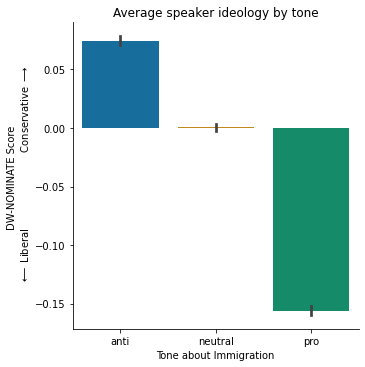

In [280]:
# IDEOLOGY VS TONE
sns.set_palette('colorblind')
sns.catplot(x='tone_label',y='nominate_dim1',data=df_tone,order=['anti','neutral','pro'],kind='bar')
plt.ylabel('DW-NOMINATE Score \n $\longleftarrow$ Liberal                        Conservative $\longrightarrow$')
plt.xlabel('Tone about Immigration')
plt.title('Average speaker ideology by tone')
plt.savefig('tone_vs_nominate.pdf',bbox_inches='tight')
plt.show()

In [ ]:
#Average by congress 
#For each congress, get the logistic regression coefficient between tone and ideology
#Prediction task: given ideology of speaker, how likely is the speech to be anti-immigration?

In [237]:
coefs_anti = []
coefs_pro = []
for congress in sorted(congress_sessions):
    regressor = LogisticRegression()
    df_tone_sub = df_tone[df_tone['congress']==congress].dropna()
    df_tone_sub['is_anti'] = [1 if x=='anti' else 0 for x in df_tone_sub['tone_label']]
    df_tone_sub['is_pro'] = [1 if x=='pro' else 0 for x in df_tone_sub['tone_label']]
    x = np.array(df_tone_sub['nominate_dim1']).reshape(-1,1)
    clf_pro = regressor.fit(x, df_tone_sub['is_pro'])
    coefs_pro.append(clf_pro.coef_[0][0])
    clf_anti = regressor.fit(x, df_tone_sub['is_anti'])
    coefs_anti.append(clf_anti.coef_[0][0])

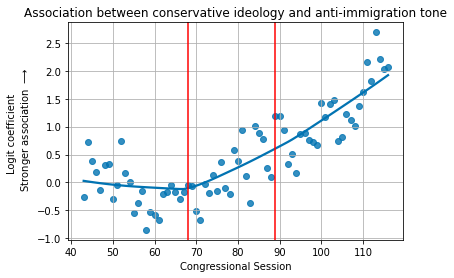

In [281]:
sns.regplot(y=coefs_anti,x=sorted(congress_sessions),lowess=True)
plt.title('Association between conservative ideology and anti-immigration tone')
plt.xlabel('Congressional Session')
plt.ylabel('Logit coefficient \n Stronger association $\longrightarrow$')
plt.grid()
#68th congress enacted immigration act of 1924
#89th congress enacted immigration act of 1965
plt.axvline(68,color='red')
plt.axvline(89,color='red')
plt.savefig('nominate_anti_associations.pdf',bbox_inches='tight')

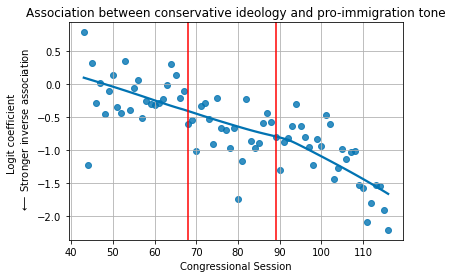

In [302]:
sns.regplot(y=coefs_pro,x=sorted(congress_sessions),lowess=True)
plt.title('Association between conservative ideology and pro-immigration tone')
plt.xlabel('Congressional Session')
plt.ylabel('Logit coefficient \n $\longleftarrow$ Stronger inverse association')
plt.grid()
#68th congress enacted immigration act of 1924
#89th congress enacted immigration act of 1965
plt.axvline(68,color='red')
plt.axvline(89,color='red')
plt.savefig('nominate_pro_associations.pdf',bbox_inches='tight')

In [221]:
year = [int(str(x)[:4]) for x in df_tone['date']]
era = []
for y in year:
    if y < 1924:
        era.append('Pre-1924')
    elif y < 1965:
        era.append('1924-1965')
    else:
        era.append('Post-1965')
df_tone['era'] = era
#68th congress enacted immigration act of 1924
#89th congress enacted immigration act of 1965

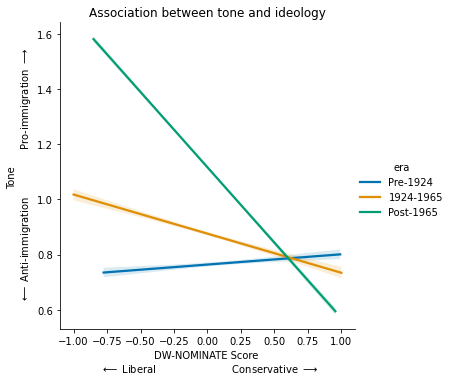

In [283]:
sns.lmplot(y='tone_label_int',
            x='nominate_dim1',
            hue = 'era',
            data=df_tone,
           scatter=False
            )
plt.title('Association between tone and ideology')
plt.xlabel('DW-NOMINATE Score \n $\longleftarrow$ Liberal                        Conservative $\longrightarrow$')
plt.ylabel('Tone \n $\longleftarrow$ Anti-immigration               Pro-immigration $\longrightarrow$')
#Relationship between tone and ideology (nominate) 
#In latest era, the more conservative a speaker is, the more anti-immigration their speech is
#Wesker relationship in middle era
#No such relationship in earliest era
plt.savefig('tone_nominate_by_era.pdf',bbox_inches='tight')

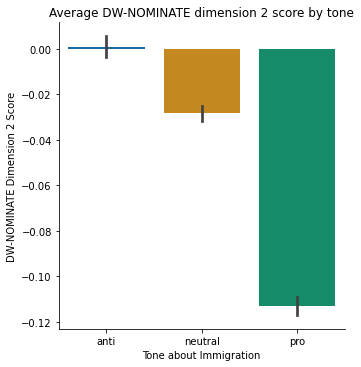

In [300]:
# Dimension 2 VS TONE
sns.set_palette('colorblind')
sns.catplot(x='tone_label',y='nominate_dim2',data=df_tone,order=['anti','neutral','pro'],kind='bar')
plt.ylabel('DW-NOMINATE Dimension 2 Score')
plt.xlabel('Tone about Immigration')
plt.title('Average DW-NOMINATE dimension 2 score by tone')
plt.savefig('tone_vs_dim2_nominate.pdf',bbox_inches='tight')
plt.show()

In [295]:
coefs_anti_dim2 = []
coefs_pro_dim2 = []
for congress in sorted(congress_sessions):
    regressor = LogisticRegression()
    df_tone_sub = df_tone[df_tone['congress']==congress].dropna()
    df_tone_sub['is_anti'] = [1 if x=='anti' else 0 for x in df_tone_sub['tone_label']]
    df_tone_sub['is_pro'] = [1 if x=='pro' else 0 for x in df_tone_sub['tone_label']]
    x = np.array(df_tone_sub['nominate_dim2']).reshape(-1,1)
    clf_pro = regressor.fit(x, df_tone_sub['is_pro'])
    coefs_pro_dim2.append(clf_pro.coef_[0][0])
    clf_anti = regressor.fit(x, df_tone_sub['is_anti'])
    coefs_anti_dim2.append(clf_anti.coef_[0][0])

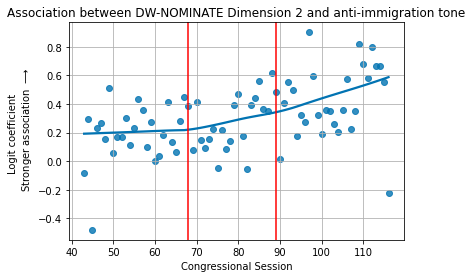

In [301]:
sns.regplot(y=coefs_anti_dim2,x=sorted(congress_sessions),lowess=True)
plt.title('Association between DW-NOMINATE Dimension 2 and anti-immigration tone')
plt.xlabel('Congressional Session')
plt.ylabel('Logit coefficient \n Stronger association $\longrightarrow$')
plt.grid()
#68th congress enacted immigration act of 1924
#89th congress enacted immigration act of 1965
plt.axvline(68,color='red')
plt.axvline(89,color='red')
plt.savefig('dim2_nominate_anti_associations.pdf',bbox_inches='tight')

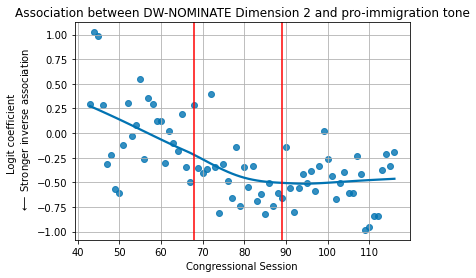

In [303]:
sns.regplot(y=coefs_pro_dim2,x=sorted(congress_sessions),lowess=True)
plt.title('Association between DW-NOMINATE Dimension 2 and pro-immigration tone')
plt.xlabel('Congressional Session')
plt.ylabel('Logit coefficient \n $\longleftarrow$ Stronger inverse association')
plt.grid()
#68th congress enacted immigration act of 1924
#89th congress enacted immigration act of 1965
plt.axvline(68,color='red')
plt.axvline(89,color='red')
plt.savefig('dim2_nominate_pro_associations.pdf',bbox_inches='tight')

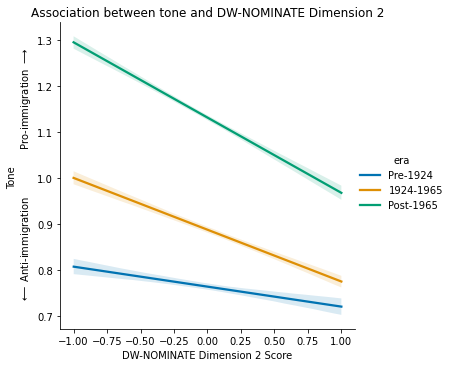

In [304]:
sns.lmplot(y='tone_label_int',
            x='nominate_dim2',
            hue = 'era',
            data=df_tone,
           scatter=False
            )
plt.title('Association between tone and DW-NOMINATE Dimension 2')
plt.xlabel('DW-NOMINATE Dimension 2 Score')
plt.ylabel('Tone \n $\longleftarrow$ Anti-immigration               Pro-immigration $\longrightarrow$')
plt.savefig('tone_dim2_nominate_by_era.pdf',bbox_inches='tight')